## Merge

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import both dfs
##set a working directory
user = os.path.expanduser('~')
display(user)

os.makedirs(f'{user}/Desktop/thesis/', exist_ok=True)
path = os.chdir(f'{user}/Desktop/'+'thesis/')

data_conflict = pd.read_csv('df_conflict.csv')
data_DALY = pd.read_csv('df_DALY_SSA.csv')

'/Users/NatStrom'

In [3]:
data_conflict.dtypes

Unnamed: 0          int64
year                int64
index             float64
dummy_neighbor    float64
iso                object
dummy_conflict      int64
dummy_sb            int64
dummy_ns            int64
dummy_os            int64
best_log          float64
lag_best_5        float64
lag_best_10       float64
lag_best_20       float64
dtype: object

In [4]:
data_DALY.dtypes

Unnamed: 0       int64
measure_name    object
country         object
sex             object
age             object
rei_id           int64
cause_name      object
cause_id         int64
rei_name        object
year             int64
daly_mean        int64
daly_upper       int64
daly_lower       int64
region_SSA      object
iso             object
dtype: object

In [5]:
data_DALY = data_DALY.rename(columns= {'year':'year_id'})
data_conflict = data_conflict.rename(columns= {'year':'year_id'})

In [6]:
from ingester3.scratch import cache_manager

cache_manager()

# This will import the Pandas extensions as well as bootstrap the object layer
from ingester3.extensions import *

In [7]:
list(data_DALY.iso.unique())

['BWA',
 'MRT',
 'CPV',
 'UGA',
 'ZMB',
 'NER',
 'BDI',
 'TCD',
 'SOM',
 'AGO',
 'CAF',
 'MDG',
 'SSD',
 'COG',
 'COM',
 'DJI',
 nan,
 'MOZ',
 'CIV',
 'NGA',
 'BEN',
 'SWZ',
 'MWI',
 'GMB',
 'ERI',
 'ZWE',
 'GNQ',
 'GAB',
 'RWA',
 'GIN',
 'GHA',
 'CMR',
 'LSO',
 'SEN',
 'STP',
 'SLE',
 'GNB',
 'KEN',
 'TGO',
 'ETH',
 'BFA',
 'LBR',
 'NAM',
 'ZAF',
 'MLI']

In [8]:
data_DALY = data_DALY.pivot_table(index=['iso','year_id'],columns=['cause_name','rei_name','sex','age'],values=['daly_mean'],  aggfunc= 'sum')

data_DALY.assign(**data_DALY.index.to_frame()) #need to do this if the data is multihierarchical

data_DALY.columns = ['_'.join(col) for col in data_DALY.columns]
data_DALY=data_DALY.reset_index()
data_DALY

,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe water source_btsx_All ages,daly_mean_Enteric infections_No access to handwashing facility_btsx_All ages,daly_mean_Enteric infections_Unsafe sanitation_btsx_All ages,daly_mean_Enteric infections_Unsafe water source_btsx_All ages,daly_mean_Lower respiratory infections_No access to handwashing facility_btsx_All ages,daly_mean_Respiratory infections and tuberculosis_No access to handwashing facility_btsx_All ages
0,AGO,1990,12264,17229,23733,12264,17229,23733,8904,17229,23733,8904,17229,23733,3360,3360
1,AGO,1991,11985,16760,23173,11985,16760,23173,8693,16760,23173,8693,16760,23173,3291,3291
2,AGO,1992,11662,16176,22487,11662,16176,22487,8433,16176,22487,8433,16176,22487,3228,3228
3,AGO,1993,11480,15822,22089,11480,15822,22089,8283,15822,22089,8283,15822,22089,3196,3196
4,AGO,1994,11380,15681,21970,11380,15681,21970,8236,15681,21970,8236,15681,21970,3144,3144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,ZWE,2015,1672,1155,1739,1672,1155,1739,632,1155,1739,632,1155,1739,1040,1040
1316,ZWE,2016,1630,1110,1682,1630,1110,1682,610,1110,1682,610,1110,1682,1019,1019
1317,ZWE,2017,1578,1073,1638,1578,1073,1638,593,1073,1638,593,1073,1638,984,984
1318,ZWE,2018,1503,1001,1539,1503,1001,1539,557,1001,1539,557,1001,1539,946,946


## Merge

In [9]:
data_DALY

,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe water source_btsx_All ages,daly_mean_Enteric infections_No access to handwashing facility_btsx_All ages,daly_mean_Enteric infections_Unsafe sanitation_btsx_All ages,daly_mean_Enteric infections_Unsafe water source_btsx_All ages,daly_mean_Lower respiratory infections_No access to handwashing facility_btsx_All ages,daly_mean_Respiratory infections and tuberculosis_No access to handwashing facility_btsx_All ages
0,AGO,1990,12264,17229,23733,12264,17229,23733,8904,17229,23733,8904,17229,23733,3360,3360
1,AGO,1991,11985,16760,23173,11985,16760,23173,8693,16760,23173,8693,16760,23173,3291,3291
2,AGO,1992,11662,16176,22487,11662,16176,22487,8433,16176,22487,8433,16176,22487,3228,3228
3,AGO,1993,11480,15822,22089,11480,15822,22089,8283,15822,22089,8283,15822,22089,3196,3196
4,AGO,1994,11380,15681,21970,11380,15681,21970,8236,15681,21970,8236,15681,21970,3144,3144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,ZWE,2015,1672,1155,1739,1672,1155,1739,632,1155,1739,632,1155,1739,1040,1040
1316,ZWE,2016,1630,1110,1682,1630,1110,1682,610,1110,1682,610,1110,1682,1019,1019
1317,ZWE,2017,1578,1073,1638,1578,1073,1638,593,1073,1638,593,1073,1638,984,984
1318,ZWE,2018,1503,1001,1539,1503,1001,1539,557,1001,1539,557,1001,1539,946,946


In [10]:
#import the control variables
data_dah = pd.read_csv('control variables/data_dah.csv')
data_wdi = pd.read_csv('control variables/data_wdi.csv')
data_vn = pd.read_csv('control variables/data_vn.csv')
data_disaster = pd.read_csv('control variables/data_disaster.csv')
data_wash = pd.read_csv('control variables/data_wash.csv')
data_uhc = pd.read_csv('control variables/data_uhc.csv')

In [11]:
#merge the datasets on iso and year
data_merged = pd.merge(data_DALY, data_conflict, how="outer", on=["iso", "year_id"])
print(data_merged.year_id.unique())

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]


In [12]:
data_merged = pd.merge(data_merged, data_dah, how="outer", on=["iso", "year_id"])
print(data_merged.year_id.unique())

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]


In [13]:
data_merged = pd.merge(data_merged, data_wdi, how="outer", on=["iso", "year_id"])
print(data_merged.year_id.unique())

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]


In [14]:
data_merged = pd.merge(data_merged, data_uhc, how="outer", on=["iso", "year_id"])
print(data_merged.year_id.unique())

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019]


/var/folders/3l/pgxm2f9j3bbgbjcj2pyxl__00000gp/T/ipykernel_1856/3120611670.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_merged = pd.merge(data_merged, data_uhc, how="outer", on=["iso", "year_id"])


In [15]:
data_merged = pd.merge(data_merged, data_wash, how="outer", on=["iso", "year_id"])
print(data_merged.year_id.unique())

[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020]


In [16]:
data_merged = pd.merge(pd.merge(data_merged,data_vn,on=["iso", "year_id"]),data_disaster,on=["iso", "year_id"])

/var/folders/3l/pgxm2f9j3bbgbjcj2pyxl__00000gp/T/ipykernel_1856/2981668124.py:1: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  data_merged = pd.merge(pd.merge(data_merged,data_vn,on=["iso", "year_id"]),data_disaster,on=["iso", "year_id"])


In [17]:
list(data_merged.columns)

['iso',
 'year_id',
 'daly_mean_All causes_No access to handwashing facility_btsx_All ages',
 'daly_mean_All causes_Unsafe sanitation_btsx_All ages',
 'daly_mean_All causes_Unsafe water source_btsx_All ages',
 'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages',
 'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages',
 'daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages',
 'daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages',
 'daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages',
 'daly_mean_Diarrheal diseases_Unsafe water source_btsx_All ages',
 'daly_mean_Enteric infections_No access to handwashing facility_btsx_All ages',
 'daly_mean_Enteric infections_Unsafe sanitation_btsx_All ages',
 'daly_mean_Enteric infections_Unsafe water source_btsx_All ages',
 'daly_mean_Lower respiratory in

In [18]:
data_merged = data_merged.drop(columns={'Unnamed: 0.1_y',
 'Unnamed: 0_y','Unnamed: 0','Unnamed: 0.1_x',
 'Unnamed: 0_y',
 'country','Unnamed: 0_x',})

In [19]:
data_final = data_merged.copy()

In [20]:
data_final['daly_all'] = data_final['daly_mean_All causes_No access to handwashing facility_btsx_All ages'] + data_final['daly_mean_All causes_Unsafe sanitation_btsx_All ages'] + data_final['daly_mean_All causes_Unsafe water source_btsx_All ages']
data_final['daly_respirat'] = data_final['daly_mean_Respiratory infections and tuberculosis_No access to handwashing facility_btsx_All ages'] + data_final['daly_mean_Lower respiratory infections_No access to handwashing facility_btsx_All ages']
data_final['daly_enteric'] = data_final['daly_mean_Enteric infections_No access to handwashing facility_btsx_All ages']+data_final['daly_mean_Enteric infections_Unsafe sanitation_btsx_All ages']+data_final['daly_mean_Enteric infections_Unsafe water source_btsx_All ages']
data_final['daly_diarrheal'] = data_final['daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages']+data_final['daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages']+data_final['daly_mean_Diarrheal diseases_Unsafe water source_btsx_All ages']
data_final['daly_cmnn'] = data_final['daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages']+data_final['daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages']+data_final['daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages']

In [21]:
data_final = data_final.loc[data_final['year_id'] <=2019]
data_final

,iso,year_id,daly_mean_All causes_No access to handwashing facility_btsx_All ages,daly_mean_All causes_Unsafe sanitation_btsx_All ages,daly_mean_All causes_Unsafe water source_btsx_All ages,"daly_mean_Communicable, maternal, neonatal, and nutritional diseases_No access to handwashing facility_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe sanitation_btsx_All ages","daly_mean_Communicable, maternal, neonatal, and nutritional diseases_Unsafe water source_btsx_All ages",daly_mean_Diarrheal diseases_No access to handwashing facility_btsx_All ages,daly_mean_Diarrheal diseases_Unsafe sanitation_btsx_All ages,...,death_tot,tot_affect,gdis_count,gdis_nunique,gdis_count_lag,daly_all,daly_respirat,daly_enteric,daly_diarrheal,daly_cmnn
0,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
1,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
2,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
3,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
4,AGO,1995,11123.0,15295.0,21507.0,11123.0,15295.0,21507.0,8061.0,15295.0,...,0.0,1007.0,0.0,0.0,0.0,47925.0,6122.0,44863.0,44863.0,47925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17854,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,654.0,270186.0,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
17855,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,654.0,270186.0,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
17856,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,654.0,270186.0,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0
17857,ZWE,2019,1454.0,953.0,1473.0,1454.0,953.0,1473.0,532.0,953.0,...,654.0,270186.0,0.0,0.0,0.0,3880.0,1844.0,2958.0,2958.0,3880.0


# descriptives

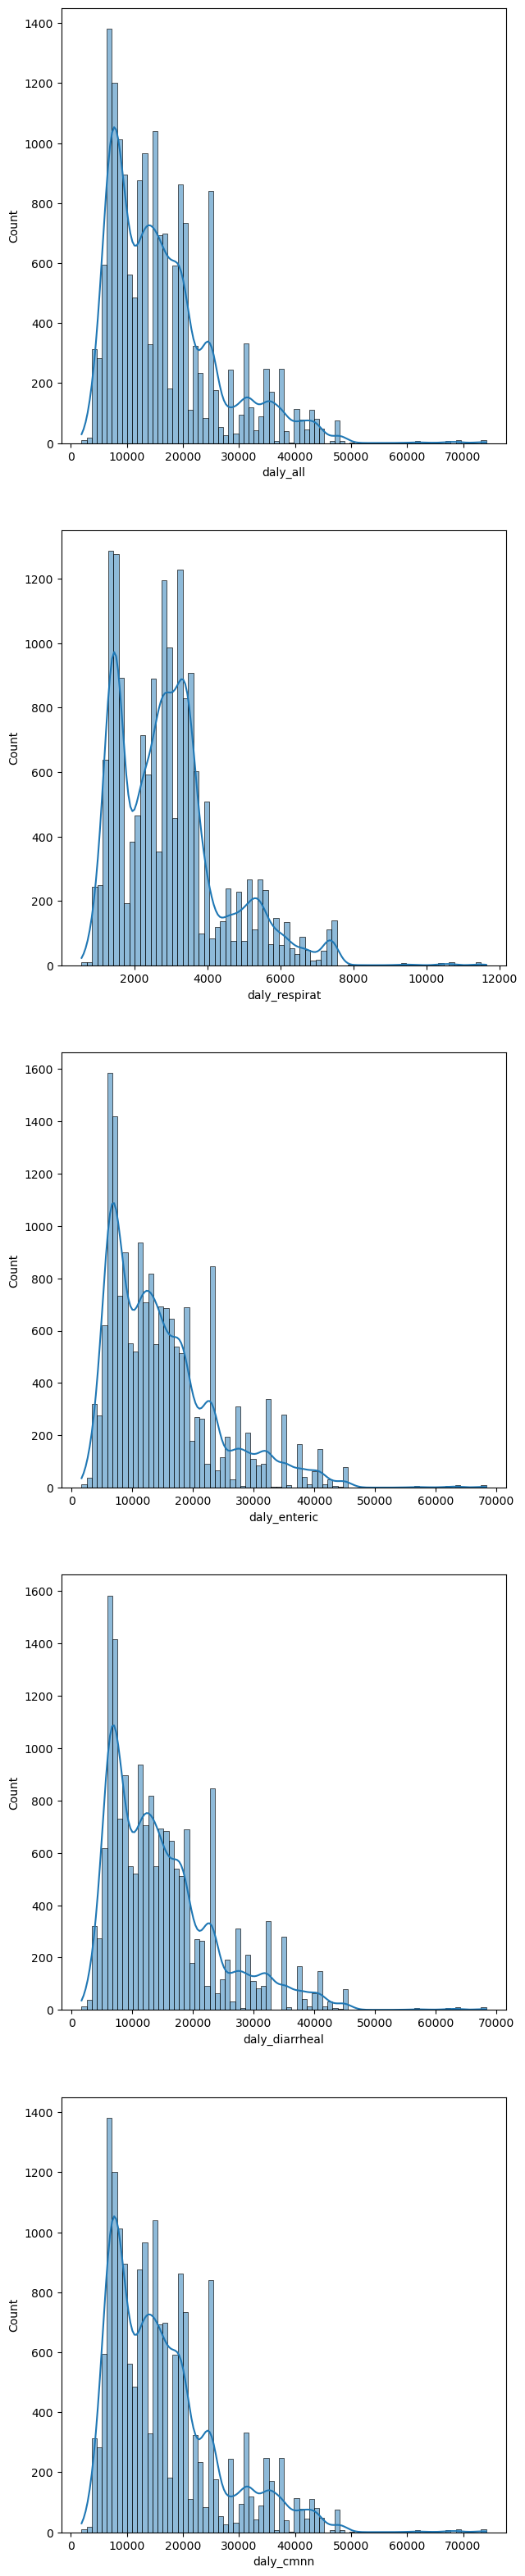

In [22]:
plot =figure, axes = plt.subplots(5,1,figsize=(7,40))
sns.histplot(data_final['daly_all'],kde = True,ax=axes[0])
sns.histplot(data_final['daly_respirat'],kde = True,ax=axes[1])
sns.histplot(data_final['daly_enteric'],kde = True,ax=axes[2])
sns.histplot(data_final['daly_diarrheal'],kde = True,ax=axes[3])
sns.histplot(data_final['daly_cmnn'],kde = True,ax=axes[4])

plt.savefig('daly1c.png')

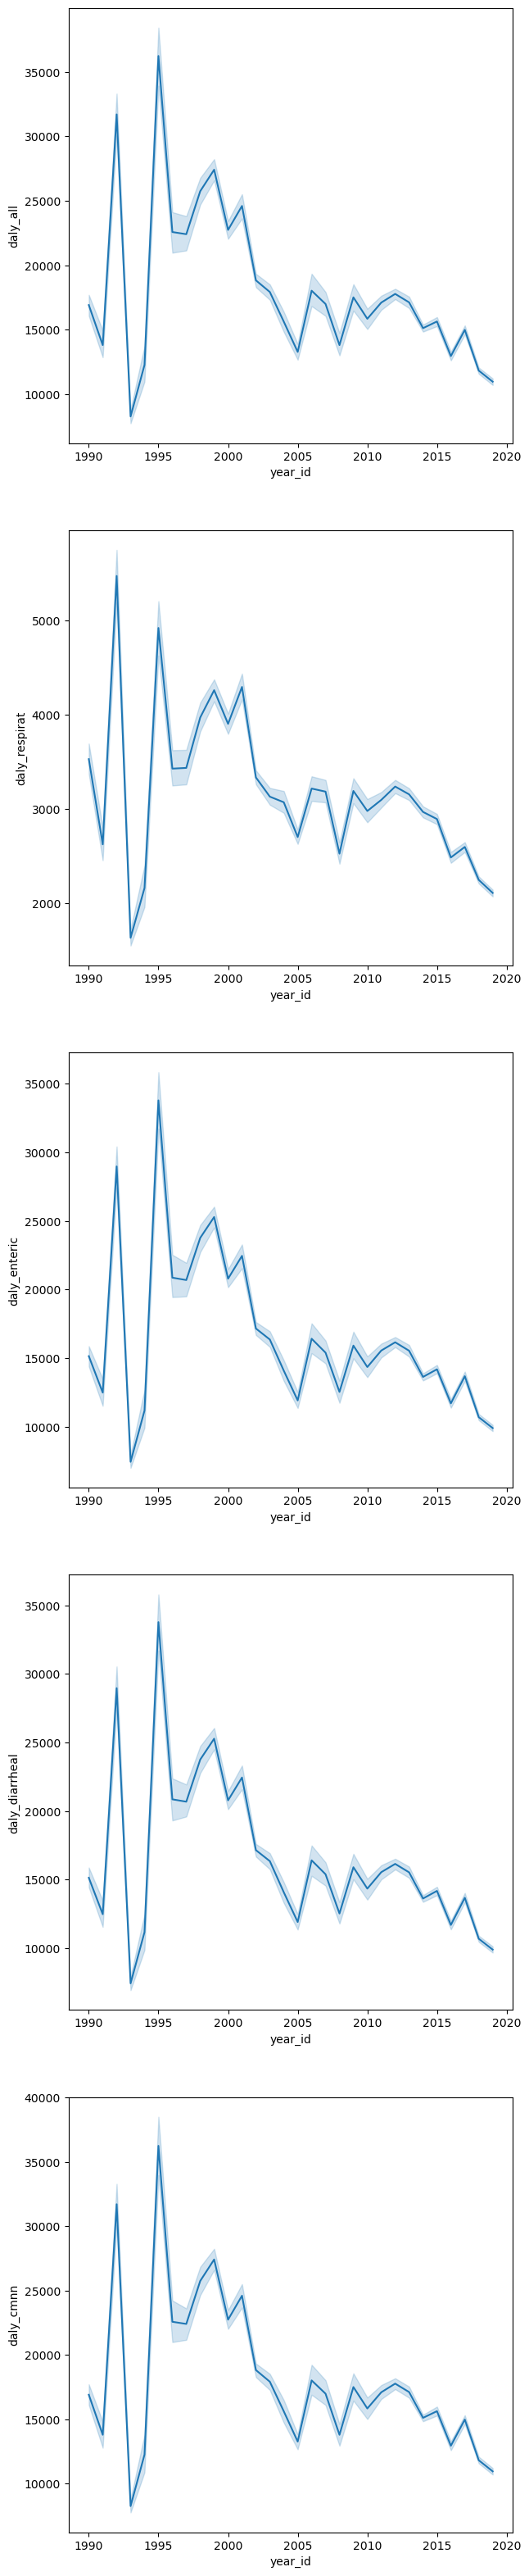

In [23]:

figure, axes = plt.subplots(5,1,figsize=(7,40))
sns.lineplot(x= 'year_id',y='daly_all',data=data_final,ax=axes[0])
sns.lineplot(x= 'year_id',y='daly_respirat',data=data_final,ax=axes[1])
sns.lineplot(x= 'year_id',y='daly_enteric',data=data_final,ax=axes[2])
sns.lineplot(x= 'year_id',y='daly_diarrheal',data=data_final,ax=axes[3])
sns.lineplot(x= 'year_id',y='daly_cmnn',data=data_final,ax=axes[4])

plt.savefig('daly2.png')

In [24]:
data_final.to_csv('data_final.csv')